In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')
from random import randint

## Understanding Binary
The Precision is basically 80/255(phi), meaning a full bit of 1111111 = 255 = 80 degrees

in this example 80 is the max degrees allowed.
and there is no min.

In [14]:
#range from 0-80 255->80
phi_prec = (80/255.)
print(phi_prec)
print(phi_prec*255)
phi = int('0b10111100',base=2)
print(phi*phi_prec)

0.3137254901960784
80.0
58.98039215686274


In [15]:
#range from 0-10
alpha = int('0b10110110',base=2)
alpha_prec = 10/255.

print(alpha*alpha_prec)

7.137254901960784


In [16]:
#range from 0-10
delta = int('0b01011001',base=2)
delta_prec = 10/255.
print(delta*delta_prec)

3.4901960784313726


The values above correspond to the values in the example and how the binary is used


In [17]:
bin(58)

'0b111010'

# System Parameters

In [18]:
food_supply = 100
man_supply = 30
board_size = 100

In [19]:
def get_food():
    food = []
    for i in range(0,food_supply):
        x = randint(0,board_size)
        y = randint(0,board_size)
        f = [x,y]
        food.append(f)
    food = np.array(food)
    return food

In [20]:
def gen1():
    men = []
    #man = [x,y,theta,phi,alpha,delta]
    for i in range(0,man_supply):
        x = randint(0,board_size)
        y = randint(0,board_size)
        theta = randint(0,359)
        phi = randint(0,255)
        alpha = randint(0,255)
        delta = randint(0,255)
        man = [x,y,theta,phi,alpha,delta]
        men.append(man)
    men = np.array(men)
    return men
        

In [21]:
men = gen1()
food = get_food()

<IPython.core.display.Javascript object>


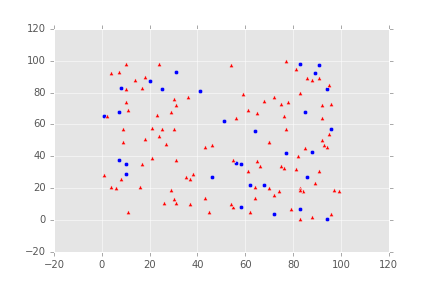

In [25]:
plt.figure()
plt.scatter(men[:,0],men[:,1])
plt.scatter(food[:,0],food[:,1],marker='^',c='red')

In [134]:
def to_bits(num):
    bin_str = format(num, '#010b')
    bin_str = bin_str[2:]
    return [bin_str[:4],bin_str[4:]]

#to_bits(1)

In [135]:
def reproduce(man1,man2):
    son1 = [randint(0,board_size),randint(0,board_size),randint(0,359)]
    son2 = [randint(0,board_size),randint(0,board_size),randint(0,359)]
    for i,v in enumerate(man1[3:7]):
        gene1 = to_bits(v)
        gene2 = to_bits(man2[i+3])
        son1_gene = gene1[0]+gene2[1]
        son2_gene = gene1[1]+gene2[0]
        son1_gene = int('0b'+son1_gene,base=2)
        son2_gene = int('0b'+son2_gene,base=2)
        son1.append(son1_gene)
        son2.append(son2_gene)
        #print(gene1,gene2)
        #print(son1_gene,son2_gene)
    return [son1,son2]

In [136]:
reproduce(men[0],men[1])

[[96, 31, 351, 251, 35, 112], [42, 9, 198, 141, 134, 197]]

In [137]:
def driver(gen, tstart, tstop, dt):
    food = get_food()
    t = [tstart]
    while t[-1] < tstop:
        t.append(t[-1]+dt)
        
    return t

In [ ]:
def find_food(man)